In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [4]:
df_DL = pd.read_csv('../../datasets/DeliveryList.csv')
df_DL[:2]

,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량
0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72
1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5


In [5]:
df_DL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      15000 non-null  object 
 1   상품명     15000 non-null  object 
 2   바코드     14992 non-null  float64
 3   발주가능상태  15000 non-null  object 
 4   입고수량    15000 non-null  int64  
 5   카테고리    15000 non-null  object 
 6   출고수량    15000 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 820.4+ KB


In [6]:
df_DL.describe(include=object)

,날짜,상품명,발주가능상태,카테고리
count,15000,15000,15000,15000
unique,84,528,3,8
top,2019-05-26,V2_114,발주가능,세탁세제
freq,226,47,14700,4265


In [7]:
df_DL['날짜_datetime'] = pd.to_datetime(df_DL['날짜'])

In [20]:
df_DL.describe(include=datetime) # 확인 필요

NameError: name 'datetime' is not defined

In [9]:
df_DL[:2]

,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량,날짜_datetime
0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72,2019-05-16
1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5,2019-05-16


In [10]:
#df_DL['날짜_datetime_year'] = df_DL['날짜_datetime'].dt.year
df_DL['날짜_datetime_month'] = df_DL['날짜_datetime'].dt.month

<Axes: xlabel='날짜_datetime_month'>

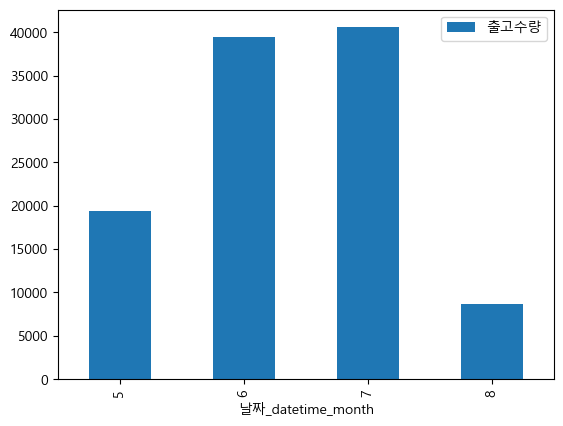

In [11]:
pd.pivot_table(data=df_DL, index='날짜_datetime_month', values='출고수량', aggfunc=sum).plot(kind='bar')  # 1차 방법(2차 데이터 사용시)

<Axes: xlabel='날짜_datetime_month', ylabel='출고수량'>

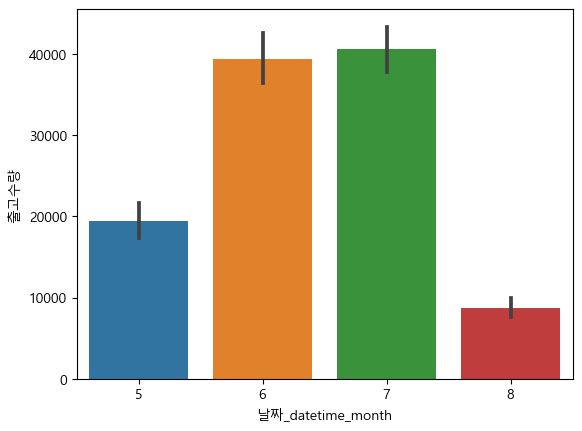

In [12]:
sns.barplot(data=df_DL, x='날짜_datetime_month', y='출고수량', estimator=sum) # 2차 방법(단순 시각화)

In [13]:
df_DL['날짜_datetime_week'] = df_DL['날짜_datetime'].dt.weekofyear


C:\Users\01-02\AppData\Local\Temp\ipykernel_4208\1934771341.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_DL['날짜_datetime_week'] = df_DL['날짜_datetime'].dt.weekofyear


<Axes: xlabel='날짜_datetime_week', ylabel='출고수량'>

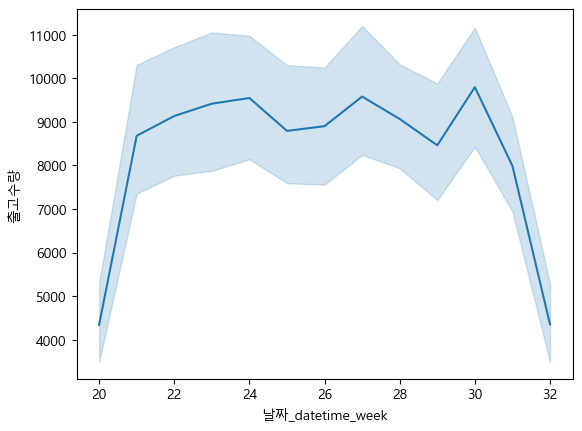

In [14]:
sns.lineplot(data=df_DL, x='날짜_datetime_week', y='출고수량', estimator=sum)
